<a href="https://colab.research.google.com/github/Youssef-Sahl/Abalone_LinearReg/blob/main/LR_Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
#Structures
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
import statsmodels.api as sm
import scipy.stats as stats

#Machine Learning
from sklearn.linear_model import LinearRegression

#**Data Reading**

In [152]:

df = pd.read_excel('Abalone.xlsx')
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [153]:
x = df[['Length','Diameter','Height','Whole_weight','Shell_weight']].to_numpy()
y = df[['Rings']].to_numpy()

# Linear Regression Model

In [154]:
model = LinearRegression(fit_intercept = False).fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('slope:', model.coef_)

coefficient of determination: 0.43730422256793855
slope: [[ 4.20229037 14.42734919 16.43597337 -7.82134769 25.01485707]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


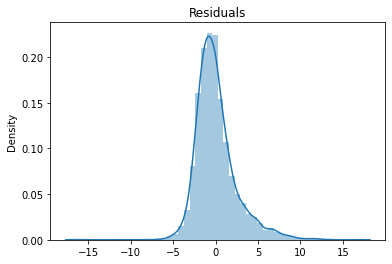

In [155]:
yhat = model.predict(x)
resid = y - yhat
sns.distplot(resid)
plt.title('Residuals')
resid_df = pd.DataFrame(resid,columns=['Rings'])
plt.show()

# **Statistcal Visualizations**

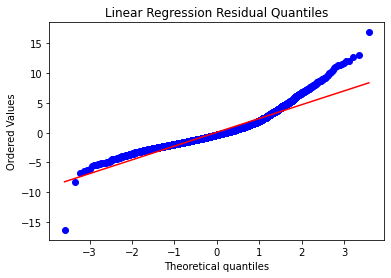

In [156]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

stats.probplot(resid_df['Rings'].values, dist='norm',plot=ax1)
ax1.set_title('Linear Regression Residual Quantiles')
plt.show()

Text(0.5, 1.0, 'Length vs Residual')

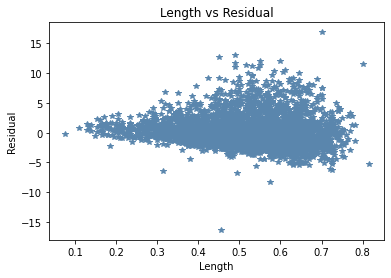

In [159]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(df['Length'],resid_df['Rings'],'*', color=sns.xkcd_rgb['dusty blue'])
ax1.set_xlabel('Length')
ax1.set_ylabel('Residual')
ax1.set_title('Length vs Residual')

Text(0.5, 1.0, 'Diameter vs Residual')

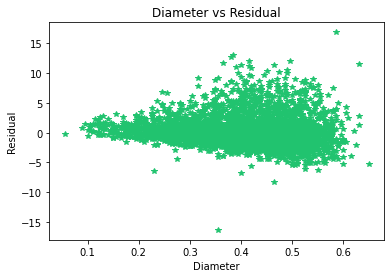

In [162]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(df['Diameter'],resid_df['Rings'],'*', color=sns.xkcd_rgb['algae green'])
ax1.set_xlabel('Diameter')
ax1.set_ylabel('Residual')
ax1.set_title('Diameter vs Residual')

Text(0.5, 1.0, 'Shell Weight vs Residual')

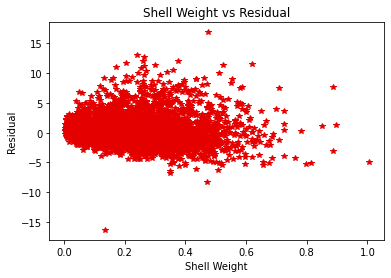

In [168]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(df['Shell_weight'],resid_df['Rings'],'*', color=sns.xkcd_rgb['red'])
ax1.set_xlabel('Shell Weight')
ax1.set_ylabel('Residual')
ax1.set_title('Shell Weight vs Residual')

Text(0.5, 1.0, 'Whole Weight vs Residual')

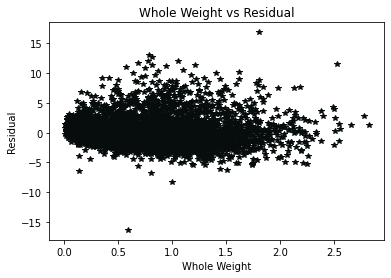

In [167]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(df['Whole_weight'],resid_df['Rings'],'*', color=sns.xkcd_rgb['almost black'])
ax1.set_xlabel('Whole Weight')
ax1.set_ylabel('Residual')
ax1.set_title('Whole Weight vs Residual')